In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#IMPORTAMOS LOS DATOS DE GITHUB
datos = pd.read_csv("https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/creditos.csv")
datos.columns

Index(['edad', 'credito', 'cumplio'], dtype='object')

## Separando datos

In [3]:
buenos = datos[datos["cumplio"]==1]
malos = datos[datos["cumplio"]==0]

## Graficando

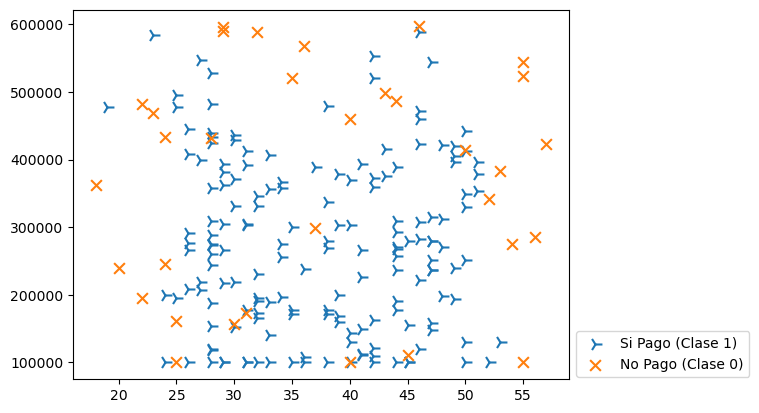

In [4]:
plt.scatter(buenos["edad"],buenos["credito"], marker="4", s=100, label="Si Pago (Clase 1)")
plt.scatter(malos["edad"],malos["credito"], marker="x", s=60, label="No Pago (Clase 0)")
plt.legend(bbox_to_anchor=(1,.15))

## Escalando los datos

In [5]:
x_data = datos[["edad","credito"]]
y_data = datos["cumplio"]

In [6]:
escalador = preprocessing.MinMaxScaler()
x_data = escalador.fit_transform(x_data)
x_data

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

## Creacion del modelo

In [55]:
clasificador = KNeighborsClassifier(n_neighbors=5) #El numero de vecinos debe ser impar
clasificador.fit(x_data, y_data)

KNeighborsClassifier()

## Validacion del modelo

In [46]:
# Tengo un cliente con los siguientes valores
edad=42
monto=500000

In [47]:
#ESCALANDO LOS DATOS
cliente = escalador.transform([[edad, monto]])
cliente

C:\Users\Arley\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.61538462, 0.80519998]])

## Prediciendo Datos

In [48]:
resultado = clasificador.predict(cliente)
prob_clase = clasificador.predict_proba(cliente)

C:\Users\Arley\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
print(f"{resultado} --> 1 si paga o 0 si no paga")
print(f"{prob_clase} --> Determina cuantos vecinos estan en cada clase")

[0] --> 1 si paga o 0 si no paga
[[0.6 0.4]] --> Determina cuantos vecinos estan en cada clase


## GRAFICANDO LOS RESULTADOS

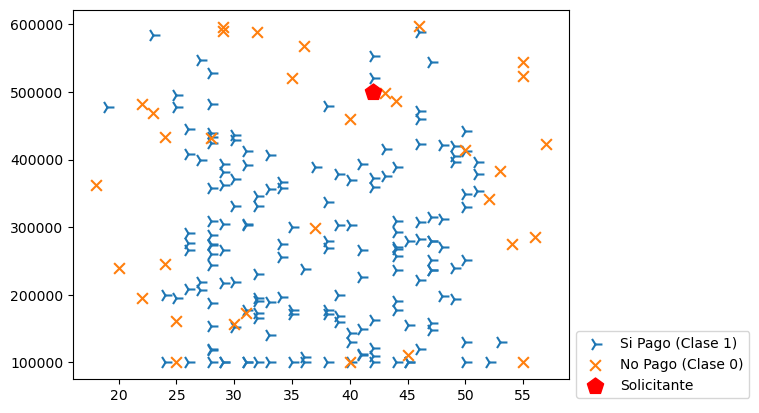

In [50]:
#DATOS
plt.scatter(buenos["edad"],buenos["credito"], marker="4", s=100, label="Si Pago (Clase 1)")
plt.scatter(malos["edad"],malos["credito"], marker="x", s=60, label="No Pago (Clase 0)")

#PREDICCION
plt.scatter(edad, monto, marker="p", s=150, color="red", label="Solicitante")
plt.legend(bbox_to_anchor=(1,.15))